# Renyi Alpha Divergence VI part 2

## Introduction

In the [previous post](https://chrisorm.github.io/VI-RA-1.html), I covered some key properties of the Renyi Alpha Divergence, and filled in some gaps left in the paper. We showed how to use the Renyi Divergence to develop a bound on the marginal log likelihood, its connection to the KL divergence and showed that a Monte Carlo approximation is biased to underestimate the bound. 

In this post, we will derive the analytic Renyi Alpha divergence for a gaussian distribution, and then see how this Renyi bound compares for different alpha values.

## Analytical Bound for a Gaussian System

Here we will derive the analytic bound for a gaussian prior and likelihood, and we approximate the posterior with a gaussian. Of course we could simply find the posterior directly, but this allows us to investigate several properties of the Renyi bound, in an exact manner. We will see some more complex examples with the stochastic bound in a later post.

First, recall that the Renyi bound is given by:

$\mathcal{L_\alpha} =  \frac{1}{1 - \alpha} log \ E_{q}[(\frac{p(z, x)}{q(z)})^{1-\alpha}] $

$ =\frac{1}{1 - \alpha} log \int q(z)^{\alpha} p(z, y)^{1-\alpha} dz $

$q(z) \sim N(\mu_{q}, \Sigma_{q})$

$p(z) \sim N(0, \Sigma_{p})$

$p(y \mid z, x) \sim N(xz, \Sigma_{l})$

$ p(y, z \mid x) \propto  exp -\frac{1}{2}[ (y-xz)^{T}\Sigma_{l}^{-1}(y-xz) + z^{T}\Sigma_{p}^{-1}z] $

$ p(y, z \mid x) \propto  exp -\frac{1}{2}( y^{T}\Sigma_{l}^{-1}y + z^{T}[\Sigma_{p}^{-1} + x^{T}\Sigma_{l}^{-1}x]z-2 z^{T}x^{T}\Sigma_{l}^{-1}y )$



If both $q$ and $p$ are Gaussians, the normalizers can be moved outside the integral, and continuing from the previous step we can rewrite the Renyi Bound:

$ =\frac{1}{1 - \alpha} log \int q(z)^{\alpha} p(z, y)^{1-\alpha} dz $

$= \frac{1}{1-\alpha} log \ \frac{1}{C} \int exp -\frac{1}{2}[ (1-\alpha)y^{T}\Sigma_{l}^{-1}y + (1-\alpha)z^{T}[\Sigma_{p}^{-1} + x^{T}\Sigma_{l}^{-1}x]z-2(1-\alpha) z^{T}x^{T}\Sigma_{l}^{-1}y  + \alpha (z-\mu_{q})^{T}\Sigma_{q}^{-1}(z-\mu_{q})]$


$= \frac{1}{1-\alpha} log \ \frac{exp -0.5 (1-\alpha)y^{T}\Sigma_{l}^{-1}y}{C}   \int exp -\frac{1}{2}[ (1-\alpha)z^{T}[\Sigma_{p}^{-1} + x^{T}\Sigma_{l}^{-1}x]z-2(1-\alpha) z^{T}x^{T}\Sigma_{l}^{-1}y  + \alpha (z-\mu_{q})^{T}\Sigma_{q}^{-1}(z-\mu_{q})]$

Where:

$C = \frac{1}{(2\pi)^{\frac{N}{2}} (2\pi)^{\frac{(1-\alpha)M}{2}} \mid\Sigma_{q}\mid^{\frac{\alpha}{2}}\mid\Sigma_{p}\mid^{\frac{1-\alpha}{2}}\mid\Sigma_{l}\mid^{\frac{1-\alpha}{2}} }$

This has the potential to become quite cluttered, so we will deal with computing the integral only, and set 
$\Lambda = \Sigma_{p}^{-1} + x^{T}\Sigma_{l}^{-1}x $

$\int exp -\frac{1}{2}[ (1-\alpha)z^{T}\Lambda z-2(1-\alpha) z^{T}x^{T}\Sigma_{l}^{-1}y  + \alpha (z-\mu_{q})^{T}\Sigma_{q}^{-1}(z-\mu_{q})] dz $

$ = \int exp -\frac{1}{2}[ (1-\alpha)z^{T}\Lambda z-2(1-\alpha) z^{T}x^{T}\Sigma_{l}^{-1}y  + \alpha z^{T}\Sigma_{q}^{-1}z - 2\alpha z^{T}\Sigma_{q}^{-1}\mu_{q} + \alpha\mu_{q}^{T}\Sigma_{q}^{-1}\mu_{q}$

$ = \int exp -\frac{1}{2}[z^{T}((1-\alpha) \Lambda + \alpha \Sigma_{q}^{-1})z - 2 z^{T}(\alpha \Sigma_{q}^{-1}\mu_{q} + (1-\alpha) x^{T}\Sigma_{l}^{-1}y) + \alpha\mu_{q}^{T}\Sigma_{q}^{-1}\mu_{q}]$

We can now complete the square in z to obtain an unnormalized Gaussian - which we then know how to integrate!

If we complete the square, it forms a Gaussian with:

$\Sigma = ((1-\alpha) \Lambda + \alpha \Sigma_{q}^{-1})^{-1}$

$\mu = \Sigma(\alpha \Sigma_{q}^{-1}\mu_{q} + (1-\alpha) x^{T}\Sigma_{l}^{-1}y)$

So:

$ = \int exp -\frac{1}{2}[z^{T}((1-\alpha) \Lambda + \alpha \Sigma_{q}^{-1})z - 2 z^{T}(\alpha \Sigma_{q}^{-1}\mu_{q} + (1-\alpha) x^{T}\Sigma_{l}^{-1}y) + \alpha\mu_{q}^{T}\Sigma_{q}^{-1}\mu_{q}]$

$ = \int exp -\frac{1}{2}[(z-\mu)^{T}\Sigma^{-1}(z-\mu) - \mu^{T}\Sigma^{-1} \mu + \alpha\mu_{q}^{T}\Sigma_{q}^{-1}\mu_{q}] dz$

$ = exp -\frac{1}{2}(- \mu^{T}\Sigma^{-1} \mu + \alpha\mu_{q}^{T}\Sigma_{q}^{-1}\mu_{q}) \int exp -\frac{1}{2}[(z-\mu)^{T}\Sigma^{-1}(z-\mu) ] dz$

$ = (2 \pi)^{\frac{N}{2}} \mid \Sigma \mid^{\frac{1}{2}} exp -\frac{1}{2}(- \mu^{T}\Sigma^{-1} \mu + \alpha\mu_{q}^{T}\Sigma_{q}^{-1}\mu_{q})  $

Now we have resolved the integral, we can use this result in the Renyi bound.

$ \frac{1}{1 - \alpha} log \int q(z)^{\alpha} p(z, y)^{1-\alpha} dz $

$ =\frac{1}{1 - \alpha} log \ \frac{exp -0.5 (1-\alpha)y^{T}\Sigma_{l}^{-1}y}{C} (2 \pi)^{\frac{N}{2}} \mid \Sigma \mid^{\frac{1}{2}} exp -\frac{1}{2}(- \mu^{T}\Sigma^{-1} \mu + \alpha\mu_{q}^{T}\Sigma_{q}^{-1}\mu_{q})  $

$ =\frac{1}{1 - \alpha} log \ \frac{(2 \pi)^{\frac{N}{2}}\mid \Sigma \mid^{\frac{1}{2}}}{C}   exp -\frac{1}{2}(- \mu^{T}\Sigma^{-1} \mu + \alpha\mu_{q}^{T}\Sigma_{q}^{-1}\mu_{q} +  (1-\alpha)y^{T}\Sigma_{l}^{-1}y)  $

Substituting in for C and cancelling yields:

$ =\frac{1}{1 - \alpha} log \ \frac{\mid \Sigma \mid^{\frac{1}{2}}}{(2\pi)^{\frac{(1-\alpha)M}{2}} \mid\Sigma_{q}\mid^{\frac{\alpha}{2}}\mid\Sigma_{p}\mid^{\frac{1-\alpha}{2}}\mid\Sigma_{l}\mid^{\frac{1-\alpha}{2}}} \bullet   exp -\frac{1}{2}(- \mu^{T}\Sigma^{-1} \mu + \\ \alpha\mu_{q}^{T}\Sigma_{q}^{-1}\mu_{q} +  (1-\alpha)y^{T}\Sigma_{l}^{-1}y)  $

Whilst this may not look like the most inviting formula, we are now in a position to compute the value of this bound for any values of the system we specified at the beginning, subject to a few mild conditions, such as Positive Semi Definite requirements for some values.

## The Bound is 0 if the approximation is exact, for all alpha values

This is quite straightforward to prove.

$ =\frac{1}{1 - \alpha} log \int q(z)^{\alpha} p(z, y)^{1-\alpha} dz $

$ =\frac{1}{1 - \alpha} log \int q(z)^{\alpha} (p(z\mid y)p(y))^{1-\alpha} dz $

$ =\frac{1}{1 - \alpha} log \int q(z)^{\alpha} p(z\mid y)^{1-\alpha} p(y)^{1-\alpha} dz $

but $q(z) = p(z \mid y)$ if the approximation is exact, so:

$ =\frac{1}{1 - \alpha} log \int p(z\mid y)^{\alpha} p(z\mid y)^{1-\alpha} p(y)^{1-\alpha} dz $

$ =\frac{1}{1 - \alpha} log \ p(y)^{1-\alpha} \int p(z\mid y) dz $

$ =\frac{1-\alpha}{1 - \alpha} log \ p(y) \ = \ log \ p(y)$

## The Bound is exact for alpha =0

The general proof is almost trivial:

$ =\frac{1}{1 - \alpha} log \int q(z)^{\alpha} p(z, y)^{1-\alpha} dz $

$ =\frac{1}{1 - 0} log \int q(z)^{0} p(z, y)^{1-0} dz $

$ = log \int p(z, y) dz  = log \ p(y)$

This is the proof in general, but here we also show this explicitly for the gaussian system we are working with.

If we go through and set $\alpha = 0$, we recover a basic MAP equation.

$\Sigma  = \Lambda^{-1}$

$\mu = \Lambda^{-1}(x^{T}\Sigma_{l}^{-1}y)$

$\mathcal{L_{\alpha=0}} \propto exp -\frac{1}{2}(y^{T}\Sigma_{l}^{-1}y - \mu^{T}\Sigma^{-1} \mu )$

$\mathcal{L_{\alpha=0}} \propto exp -\frac{1}{2}(y^{T}\Sigma_{l}^{-1}y - (y^{T}\Sigma_{l}^{-1}x\Lambda^{-1} x^{T}\Sigma_{l}^{-1}y) )$

$\mathcal{L_{\alpha=0}} \propto exp -\frac{1}{2}(y^{T}(\Sigma_{l}^{-1} - \Sigma_{l}^{-1}x\Lambda ^{-1}x^{T}\Sigma_{l}^{-1})y)$

If we substitute for $\Lambda$ the equivalence becomes clear, and we can invert to find the covariance matrix, we can make use of the [Sherman-Morrison-Woodbury Identity](https://en.wikipedia.org/wiki/Woodbury_matrix_identity) in reverse.

$\mathcal{L_{\alpha=0}} \propto exp -\frac{1}{2}(y^{T}(\Sigma_{l}^{-1} - \Sigma_{l}^{-1}x(\Sigma_{p}^{-1} + x^{T}\Sigma_{l}^{-1}x ) ^{-1}x^{T}\Sigma_{l}^{-1})y)$


$\mathcal{L_{\alpha=0}} \propto exp -\frac{1}{2}(y^{T}(\Sigma_{l} + x \Sigma_{p}x^{T})^{-1}y)$

This is just the marginal distribution of y - which is the exact thing we are looking to bound! It is relatively simple to show the normalizer also cancels down to give an exact Gaussian.

I have possibly moved a little fast if you are not familiar with the algebra techniques I used, and if I have lost you, PRML by Chris Bishop covers some of this at a more gentle pace in Section 2.3 (and also partly during the Bayesian Linear Regression section).

## How the bound behaves for a Gaussian System

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')

In [2]:
def sigma(alpha, lam, sq):
    
    return((1-alpha)*lam + alpha*(np.linalg.inv(sq)))**-1

def lam_(sp, sl, x):
    return sp**-1 +  x.T.dot(np.linalg.inv(sl)).dot(x)

def mu_(alpha, lam, muq, sq, sl, y, x ):
    s = sigma(alpha, lam, sq)
    
    return s*(alpha*(np.linalg.inv(sq))*muq + (1-alpha)*x.T.dot(np.linalg.inv(sl)).dot(y))

def bound(alpha, muq, sq, sl, sp, y, x ):
    lam = lam_(sp, sl, x)
    mu = mu_(alpha, lam, muq, sq, sl, y, x )
    s = sigma(alpha, lam, sq)
    
    exponent = -0.5*(alpha*muq.T.dot(np.linalg.inv(sq)).dot(muq) + (1-alpha)*y.T.dot(np.linalg.inv(sl)).dot(y) -
     mu.T.dot(np.linalg.inv(s)).dot(mu))
    
    normalizer = np.linalg.det(s)/ ((np.linalg.det(sq)**alpha) *(np.linalg.det(sp)**(1-alpha))
                                    *(np.linalg.det(sl)**(1-alpha)) * (2*np.pi)**((1-alpha)*sl.shape[0]))
    return (0.5*np.log(normalizer) + exponent)/(1-alpha)

In [3]:

x = np.arange(0,20,1.1).reshape(-1,1)
sl = np.identity(x.shape[0])*0.2
y = np.random.multivariate_normal(0.4*x.ravel(), sl)

sp = np.array(1.0).reshape(-1,1)
mq = np.array(0.0).reshape(-1,1)

sq = np.array(0.002).reshape(-1,1)
sl = np.identity(x.shape[0])*0.2

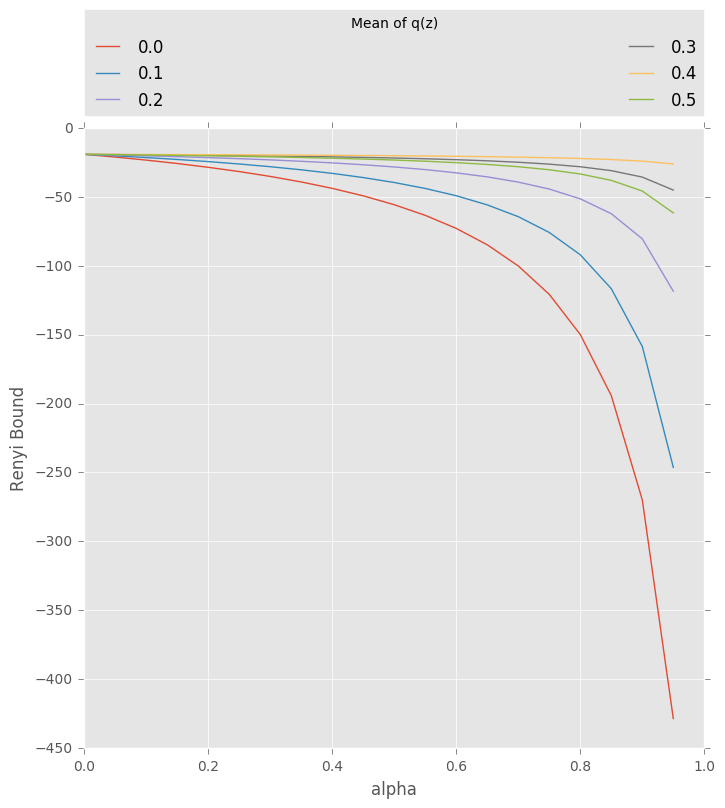

In [4]:
plt.figure(figsize=(8,8))
for m in np.arange(0,0.6, 0.1):
    alphas = []
    b = []
    for a in np.arange(0, 1, 0.05):
        alphas.append(a)
        b.append(bound(a,m.reshape(-1,1), sq, sl, sp, y, x))

    b= np.concatenate(b)

    plt.plot(alphas, b, label=str(m))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0., title="Mean of q(z)")
plt.xlabel('alpha')
plt.ylabel('Renyi Bound')

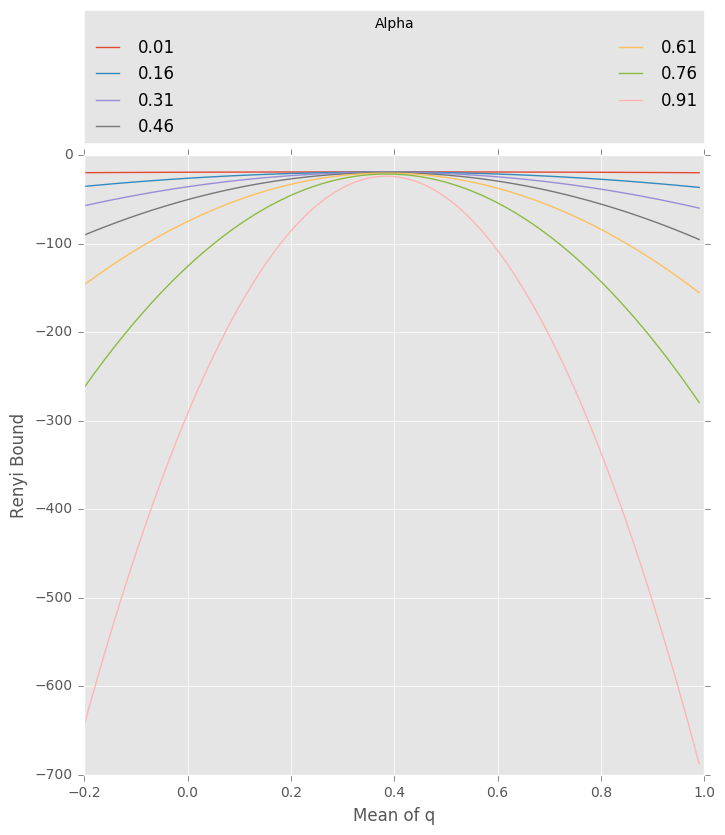

In [5]:
plt.figure(figsize=(8,8))

for a in np.arange(0.01, 1.01, 0.15):
    means = []
    b = []
    for m in np.arange(-0.2,1.0, 0.01):
        means.append(m)
        b.append(bound(a,m.reshape(-1,1), sq, sl, sp, y, x))

    b= np.concatenate(b)

    plt.plot(means, b, label=str(a))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0., title="Alpha")
plt.xlabel('Mean of q')
plt.ylabel('Renyi Bound')

As we can see, as alpha increases, the curvature of the bound increases. The bound sits below the true marginal likelihood at all points (this is most obvious for high alpha values). This is because we only modify the mean, and use a fixed variance that is not exactly the true posterior variance. 

## Different alphas induce different preferences

Let's say we have a system:

$q(z) \sim N(\mu_{q}, \Sigma_{q})$

$p(z) \sim N(0, \Sigma_{p})$

$p(y \mid z, x) \sim N(xz, \Sigma_{l})$

$p(z \mid y, x) \sim N(\sigma x^{T} \Sigma_{l}^{-1}y, \sigma)$

where $\sigma = (\Sigma_{p}^{-1} + x^{T}\Sigma_{l}^{-1} x)^{-1}$

In [6]:
x = np.arange(0,20,1.1).reshape(-1,1)
y = np.random.multivariate_normal(0.4*x.ravel(), sl)

sp = np.array(1.0).reshape(-1,1)
sl = np.identity(x.shape[0])*0.2


In [7]:
posterior_var = np.linalg.inv(np.linalg.inv(sp)+x.T.dot(np.linalg.inv(sl)).dot(x))
posterior_mean = posterior_var.dot(x.T).dot(np.linalg.inv(sl)).dot(y)
print("Posterior Mean",posterior_mean, ". Posterior Variance:", posterior_var)

qmean1 = np.array(posterior_mean).reshape(-1,1)
qvar1 = np.array(5e-6).reshape(-1,1)

qmean2 = np.array(posterior_mean).reshape(-1,1)
qvar2 = np.array(0.002).reshape(-1,1)

Posterior Mean [ 0.41522244] . Posterior Variance: [[  7.83671422e-05]]


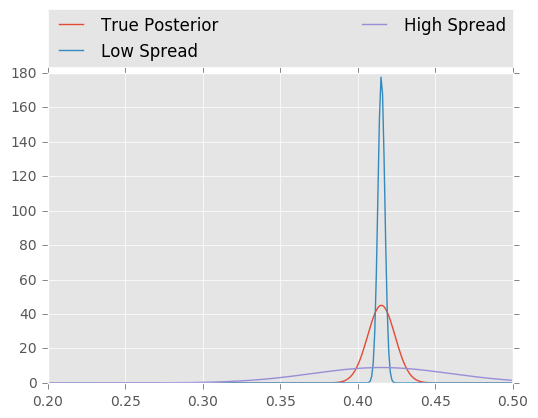

In [8]:
from scipy.stats import multivariate_normal

z = np.arange(0.2,0.5,0.001)
p = multivariate_normal.pdf(z, mean=posterior_mean, cov = posterior_var)
plt.plot(z, p, label="True Posterior")

q1 = multivariate_normal.pdf(z, mean=qmean1, cov = qvar1)
plt.plot(z, q1, label="Low Spread")

q2 = multivariate_normal.pdf(z, mean=qmean2, cov = qvar2)
plt.plot(z, q2, label="High Spread")

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

In [9]:
for a in [0.1, 0.95]:
    print("Bound for low Spread:",bound(a,qmean1, qvar1, sl, sp, y, x), " with alpha ", a)
    print("Bound for high Spread:",bound(a,qmean2, qvar2, sl, sp, y, x), " with alpha ", a)

Bound for low Spread: [[-13.81421434]]  with alpha  0.1
Bound for high Spread: [[-13.58920791]]  with alpha  0.1
Bound for low Spread: [[-14.36193029]]  with alpha  0.95
Bound for high Spread: [[-19.84787177]]  with alpha  0.95


As this shows, the Renyi bound produces strong mode seeking behaviour with high alpha, and mass covering with low alpha. There is also an alpha (approx 0.4 in this case), which has no preference between the two behaviours.

In [10]:
a=0.4
print("Bound for low Spread:",bound(a,qmean1, qvar1, sl, sp, y, x), " with alpha ", a)
print("Bound for high Spread:",bound(a,qmean2, qvar2, sl, sp, y, x), " with alpha ", a)

Bound for low Spread: [[-14.1539275]]  with alpha  0.4
Bound for high Spread: [[-14.14098968]]  with alpha  0.4


# Summary

In this post, we have derived the exact Renyi Variational Bound for a Gaussian system, and used this to show how different alpha values induce different behaviours. We have also shown some useful properties that the bound has, so we know that if our approximation is exact, our bound is exact also.

In the next post we will use the stochastic approximation for the bound, and see how the unbiased nature of it affects the bound.